# Introduction to Python for Machine Learning

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load dataset
df = pd.read_csv("C:/Users/msami/Desktop/FoodBalanceSheets_E_Africa_NOFLAG.csv", encoding="latin-1")

In [3]:
#get a view of the data
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [4]:
#check the number of rows and columns
df.shape

(60943, 12)

In [5]:
#have a view of the features
df.columns

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Unit', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018'],
      dtype='object')

In [6]:
# get more intuition on the data
df.describe()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943.000000,60943.000000,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
mean,134.265576,2687.176706,3814.856456,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,146.055739,2212.007033,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2562.000000,684.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2630.000000,5142.000000,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,2775.000000,5511.000000,8.340000,8.460000,8.430000,9.000000,9.000000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000


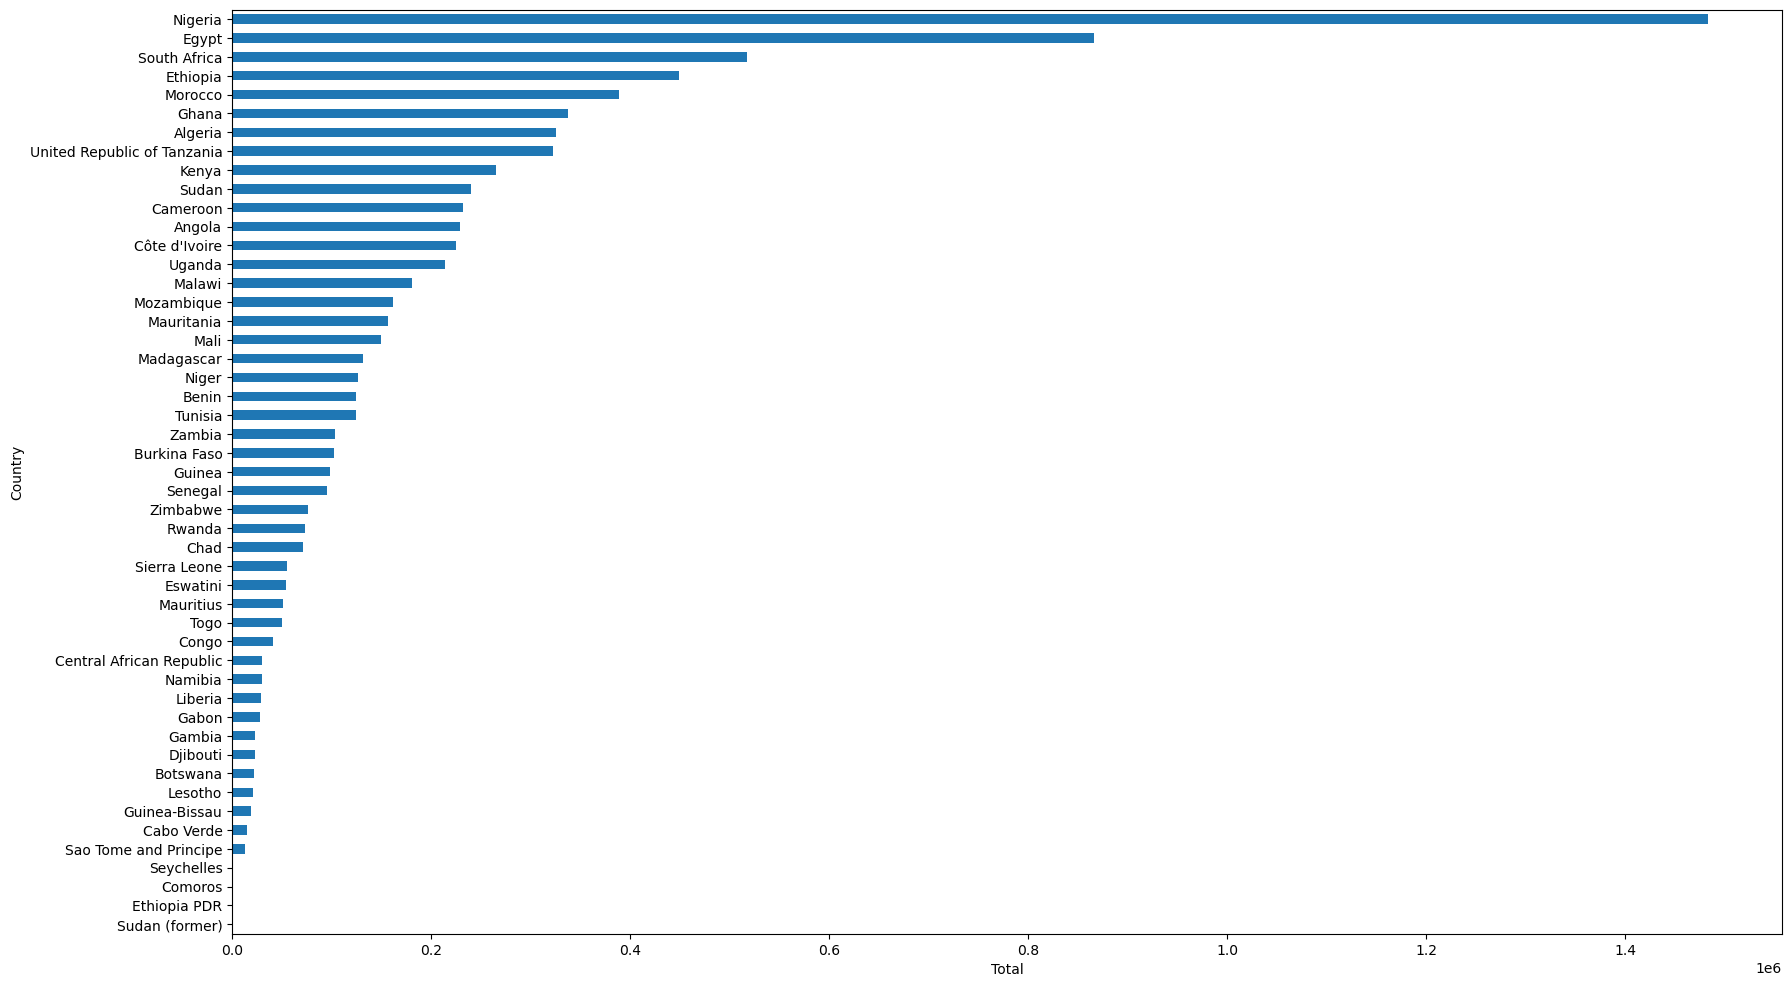

In [7]:
#visualize the total in 2017
plt.figure(figsize=[20,12])
df.groupby("Area")["Y2017"].sum().sort_values().plot(kind="barh")
plt.ylabel("Country")
plt.xlabel("Total");

In [8]:
#isolate madagascar for further analysis
mask = (df["Area"] == "Madagascar")
df_m = df[mask]

In [9]:
df_m

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
30715,129,Madagascar,2501,Population,511,Total Population - Both sexes,1000 persons,23590.00,24234.00,24894.00,25571.00,26262.00
30716,129,Madagascar,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
30717,129,Madagascar,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,1986.00,1922.00,1918.00,1943.00,1938.00
30718,129,Madagascar,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,44.45,43.26,43.35,43.94,44.17
30719,129,Madagascar,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,22.18,22.97,23.83,25.26,24.12
...,...,...,...,...,...,...,...,...,...,...,...,...
32149,129,Madagascar,2899,Miscellaneous,5142,Food,1000 tonnes,10.00,11.00,11.00,11.00,12.00
32150,129,Madagascar,2899,Miscellaneous,645,Food supply quantity (kg/capita/yr),kg,0.44,0.44,0.44,0.44,0.44
32151,129,Madagascar,2899,Miscellaneous,664,Food supply (kcal/capita/day),kcal/capita/day,0.00,0.00,0.00,0.00,0.00
32152,129,Madagascar,2899,Miscellaneous,674,Protein supply quantity (g/capita/day),g/capita/day,0.01,0.01,0.01,0.01,0.01


In [10]:
#select the element code forprotein supply
df_m[df_m["Element Code"] == 674].sum()

Area Code                                                   14319
Area            MadagascarMadagascarMadagascarMadagascarMadaga...
Item Code                                                  299405
Item            Grand TotalVegetal ProductsAnimal ProductsCere...
Element Code                                                74814
Element         Protein supply quantity (g/capita/day)Protein ...
Unit            g/capita/dayg/capita/dayg/capita/dayg/capita/d...
Y2014                                                      177.79
Y2015                                                      173.05
Y2016                                                       173.4
Y2017                                                      175.75
Y2018                                                      176.64
dtype: object

###### The next code blocks are to find the sum of items in the selected years

In [11]:
df.groupby("Item")["Y2015"].sum()

Item
Alcohol, Non-Food        2180.00
Alcoholic Beverages     98783.72
Animal Products         11811.73
Animal fats            200675.72
Apples and products     10559.15
                         ...    
Vegetables, Other      158104.08
Vegetal Products       107064.17
Wheat and products     234710.51
Wine                     4251.81
Yams                   203151.78
Name: Y2015, Length: 119, dtype: float64

In [12]:
df.groupby("Item")["Y2018"].sum()

Item
Alcohol, Non-Food        2293.00
Alcoholic Beverages     97847.27
Animal Products         11578.61
Animal fats            269648.27
Apples and products      9640.51
                         ...    
Vegetables, Other      163987.21
Vegetal Products       107775.39
Wheat and products     242645.19
Wine                     4039.32
Yams                   221272.09
Name: Y2018, Length: 119, dtype: float64

In [13]:
df.groupby("Element")["Y2017"].sum()

Element
Domestic supply quantity                  2088198.10
Export Quantity                            182338.80
Fat supply quantity (g/capita/day)          10253.84
Feed                                       223705.68
Food                                      1258888.28
Food supply (kcal/capita/day)              454681.00
Food supply quantity (kg/capita/yr)         48690.04
Import Quantity                            294559.09
Losses                                     160614.00
Other uses (non-food)                       91645.97
Processing                                 292836.00
Production                                2030056.89
Protein supply quantity (g/capita/day)      11842.45
Residuals                                   35500.00
Seed                                        24870.14
Stock Variation                             54316.91
Total Population - Both sexes             1112641.00
Tourist consumption                            91.00
Name: Y2017, dtype: float64

In [14]:
#get the unique number of countries in the dataset
df.Area.nunique()

49

In [15]:
# find out the stock variation in different years
df.groupby(df["Element"]=="Stock Variation")["Y2014", "Y2015", "Y2016", "Y2017","Y2018"].sum()

C:\Users\msami\AppData\Local\Temp\ipykernel_24984\2261691678.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(df["Element"]=="Stock Variation")["Y2014", "Y2015", "Y2016", "Y2017","Y2018"].sum()


,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,
False,7906336.30,7997429.24,8079332.53,8321412.28,8534052.05
True,58749.83,34910.99,33140.12,54316.91,20577.91


In [16]:
# check correlation between element code and the years
df.corr()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Area Code,1.000000,-0.005159,-0.000209,0.006164,0.005472,0.005247,0.005006,0.005665
Item Code,-0.005159,1.000000,-0.024683,0.021722,0.020857,0.020109,0.021494,0.021314
Element Code,-0.000209,-0.024683,1.000000,0.024457,0.023889,0.023444,0.024254,0.024279
Y2014,0.006164,0.021722,0.024457,1.000000,0.994647,0.996081,0.995230,0.994872
Y2015,0.005472,0.020857,0.023889,0.994647,1.000000,0.995739,0.988048,0.988208
Y2016,0.005247,0.020109,0.023444,0.996081,0.995739,1.000000,0.992785,0.992757
Y2017,0.005006,0.021494,0.024254,0.995230,0.988048,0.992785,1.000000,0.998103
Y2018,0.005665,0.021314,0.024279,0.994872,0.988208,0.992757,0.998103,1.000000


In [17]:
#check the total in 2017 for each country
df.groupby("Area")["Y2017"].sum().sort_values()

Area
Sudan (former)                       0.00
Ethiopia PDR                         0.00
Comoros                             59.84
Seychelles                         442.34
Sao Tome and Principe            12662.63
Cabo Verde                       14650.74
Guinea-Bissau                    19102.77
Lesotho                          21267.96
Botswana                         22101.30
Djibouti                         22729.91
Gambia                           23154.18
Gabon                            27979.64
Liberia                          29342.20
Namibia                          29874.89
Central African Republic         29937.00
Congo                            41181.68
Togo                             49841.88
Mauritius                        51114.83
Eswatini                         54343.33
Sierra Leone                     55311.33
Chad                             71594.68
Rwanda                           73663.69
Zimbabwe                         75919.34
Senegal                      

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


In [19]:
# count number of missing values in Y2014
df["Y2014"].isnull().sum()

1589

In [20]:
#percent missing values in 2014
(df["Y2014"].isnull().sum())/60943*100

2.6073544131401474